# Importing Data

In [90]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Overview

In [91]:
files = os.listdir('.')
print(files)

['.ipynb_checkpoints', 'archive.zip', 'circuits.csv', 'constructors.csv', 'constructor_results.csv', 'constructor_standings.csv', 'drivers.csv', 'driver_standings.csv', 'f1.ipynb', 'final_df_winner_constructors.csv', 'lap_times.csv', 'pit_stops.csv', 'qualifying.csv', 'races.csv', 'results.csv', 'seasons.csv', 'sprint_results.csv', 'status.csv']


In [92]:
driver_standing = pd.read_csv("driver_standings.csv")
stat = pd.read_csv("status.csv")

## Circuit CSV

In [93]:
circuit = pd.read_csv("circuits.csv")
circuit.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


## Qualifying CSV

In [94]:
qualifying = pd.read_csv("qualifying.csv")
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


## Result CSV

In [95]:
result = pd.read_csv("results.csv")
result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


## Driver CSV

In [96]:
driver = pd.read_csv("drivers.csv")
driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


## Race CSV

In [97]:
race = pd.read_csv("races.csv")
race.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


## Constructor CSV

In [98]:
constructor = pd.read_csv("constructors.csv")
constructor.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


## Constructor Standing CSV

In [99]:
con_stand = pd.read_csv("constructor_standings.csv")
con_stand.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


# Merging Data 

In [101]:
# Renaming columns for clarity
constructor.rename(columns={'name': 'constructor_name'}, inplace=True)
race.rename(columns={'name': 'race_name'}, inplace=True)
circuit.rename(columns={'name': 'circuit_name'}, inplace=True)
driver.rename(columns={'surname': 'race_winner'}, inplace=True)
result.rename(columns={'rank': 'race_position'}, inplace=True)
con_stand.rename(columns={'position': 'constructor_winner'}, inplace=True)

con1 = pd.merge(result, race, on ='raceId')
con2 = pd.merge(con1, driver, on = 'driverId')
con3 = pd.merge(con2, driver_standing, on = 'driverId')
con4 = pd.merge(con3, constructor, on ='constructorId')
final_df = pd.merge(con4, stat, on ='statusId')
pd.get_option("display.max_columns",None)
final_df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,constructor_name,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,...,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,...,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,...,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,...,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,...,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


## Data Transformation and Cleansing

In [102]:
# Assuming 'final_df' is your DataFrame
# List of columns to drop
columns_to_drop = ['url_y', 'url_x', 'position_x', 'fastestLapTime', 'positionText_x', 
                   'driverRef', 'constructorRef', 'nationality_y', 'positionText_y', 
                   'raceId_y', 'points_y', 'dob', 'statusId']

# Check if columns exist in the DataFrame and drop them
existing_columns_to_drop = [col for col in columns_to_drop if col in final_df.columns]
final_df = final_df.drop(columns=existing_columns_to_drop)

# Additional columns to drop
columns_to_exclude = ['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time']
existing_columns_to_exclude = [col for col in columns_to_exclude if col in final_df.columns]
final_df = final_df.drop(columns=existing_columns_to_exclude)

# Filter the DataFrame to keep only rows from the year 2000 onwards
final_df = final_df[final_df['year'] >= 2000]

In [103]:
missing_values = final_df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
race_position        0
fastestLapSpeed      0
year                 0
round                0
circuitId            0
race_name            0
date                 0
time_y               0
quali_date           0
quali_time           0
sprint_date          0
sprint_time          0
number_y             0
code                 0
forename             0
race_winner          0
nationality_x        0
driverStandingsId    0
position_y           0
wins                 0
constructor_name     0
url                  0
status               0
dtype: int64


In [104]:
duplicates = final_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [105]:
final_df['race_position'] = pd.to_numeric(final_df['race_position'], errors='coerce')
final_df['year'] = pd.to_numeric(final_df['year'], errors='coerce')

In [106]:
# Select only numerical columns
numerical_df = final_df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR for the numerical columns
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame based on the numerical columns' IQR criteria
filtered_df = final_df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the first few rows of the filtered DataFrame
filtered_df.head()


,resultId,raceId_x,driverId,constructorId,number_x,grid,positionOrder,points_x,laps,time_x,...,code,forename,race_winner,nationality_x,driverStandingsId,position_y,wins,constructor_name,url,status
18,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,HAM,Lewis,Hamilton,British,13652,3,0,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
19,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,HAM,Lewis,Hamilton,British,68157,2,0,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
20,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,HAM,Lewis,Hamilton,British,13615,3,0,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
21,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,HAM,Lewis,Hamilton,British,13632,3,0,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished
22,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,HAM,Lewis,Hamilton,British,13673,1,0,McLaren,http://en.wikipedia.org/wiki/McLaren,Finished


In [107]:
# Display the data types
print("\nData types after conversion:\n", final_df.dtypes)


Data types after conversion:
 resultId               int64
raceId_x               int64
driverId               int64
constructorId          int64
number_x              object
grid                   int64
positionOrder          int64
points_x             float64
laps                   int64
time_x                object
milliseconds          object
fastestLap            object
race_position        float64
fastestLapSpeed       object
year                   int64
round                  int64
circuitId              int64
race_name             object
date                  object
time_y                object
quali_date            object
quali_time            object
sprint_date           object
sprint_time           object
number_y              object
code                  object
forename              object
race_winner           object
nationality_x         object
driverStandingsId      int64
position_y             int64
wins                   int64
constructor_name      object
url         

# Exploratory Data Analysis and Visualization

In [108]:
print(final_df.head())

   resultId  raceId_x  driverId  constructorId number_x  grid  positionOrder  \
0         1        18         1              1       22     1              1   
1         1        18         1              1       22     1              1   
2         1        18         1              1       22     1              1   
3         1        18         1              1       22     1              1   
4         1        18         1              1       22     1              1   

   points_x  laps       time_x  ... code forename  race_winner nationality_x  \
0      10.0    58  1:34:50.616  ...  HAM    Lewis     Hamilton       British   
1      10.0    58  1:34:50.616  ...  HAM    Lewis     Hamilton       British   
2      10.0    58  1:34:50.616  ...  HAM    Lewis     Hamilton       British   
3      10.0    58  1:34:50.616  ...  HAM    Lewis     Hamilton       British   
4      10.0    58  1:34:50.616  ...  HAM    Lewis     Hamilton       British   

   driverStandingsId  position_y  wins

In [109]:
print(final_df.describe())

           resultId      raceId_x      driverId  constructorId          grid  \
count  1.853592e+06  1.853592e+06  1.853592e+06   1.853592e+06  1.853592e+06   
mean   1.551192e+04  6.192282e+02  2.659197e+02   4.284524e+01  9.268868e+00   
std    1.040267e+04  4.358956e+02  3.720976e+02   6.881565e+01  5.883984e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  0.000000e+00   
25%    2.414000e+03  1.160000e+02  8.000000e+00   4.000000e+00  4.000000e+00   
50%    2.162200e+04  8.760000e+02  2.000000e+01   9.000000e+00  9.000000e+00   
75%    2.394900e+04  9.970000e+02  8.150000e+02   2.100000e+01  1.400000e+01   
max    2.652400e+04  1.132000e+03  8.600000e+02   2.150000e+02  2.400000e+01   

       positionOrder      points_x          laps  race_position          year  \
count   1.853592e+06  1.853592e+06  1.853592e+06   1.570854e+06  1.853592e+06   
mean    9.741276e+00  4.892201e+00  5.307022e+01   8.917862e+00  2.012143e+03   
std     6.256370e+00  6.812287e+00  

In [110]:
print(final_df['constructor_name'].value_counts())
print(final_df['race_winner'].value_counts())

constructor_name
Ferrari           268128
McLaren           229050
Red Bull          168571
Mercedes          157013
Williams          143226
Renault           121010
Sauber             87671
Force India        77554
Toro Rosso         61861
Haas F1 Team       56351
Toyota             44331
Aston Martin       38698
Alfa Romeo         38288
BAR                36566
Alpine F1 Team     33508
Honda              33337
Lotus F1           30942
Jordan             29502
Jaguar             22984
BMW Sauber         21736
AlphaTauri         17992
Racing Point       16384
Minardi            16313
Benetton           14756
Lotus              13497
Brawn              10693
HRT                10312
Prost               9956
Arrows              8993
Caterham            7357
Super Aguri         5507
Marussia            5442
Virgin              4750
RB F1 Team          4008
Manor Marussia      2987
Spyker              2734
MF1                 1232
Spyker MF1           352
Name: count, dtype: int64
race_wi

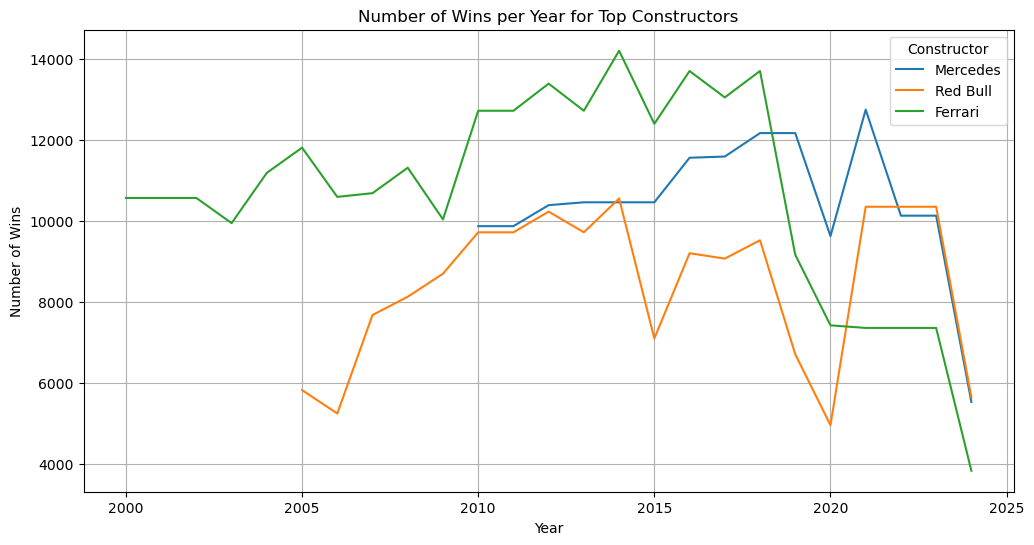

In [111]:
top_constructors = ['Mercedes', 'Red Bull', 'Ferrari']
wins_data = {}

for constructor in top_constructors:
    wins_data[constructor] = final_df[final_df['constructor_name'] == constructor].groupby('year').size()

plt.figure(figsize=(12, 6))
for constructor, wins in wins_data.items():
    wins.plot(kind='line', label=constructor)


plt.title('Number of Wins per Year for Top Constructors')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Constructor')
plt.grid(True)
plt.show()

## Key Insight

## Predictive Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_26548\130965213.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df = final_df.fillna(method='ffill')  # Forward fill as an example


Model Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       448
           2       1.00      1.00      1.00      1692
           3       1.00      1.00      1.00      1299
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00     30770
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00     13216
           8       1.00      1.00      1.00        87
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00       140
          11       1.00      1.00      1.00       227
          12       1.00      1.00      1.00     10950
          13       1.00      1.00      1.00       198
          14       1.00      1.00      1.00        69
          15       1.00      1.00      1.00       582
          16       1.00      1.00      1.00        74
          17       1.00      1.00      1.00     19944
      

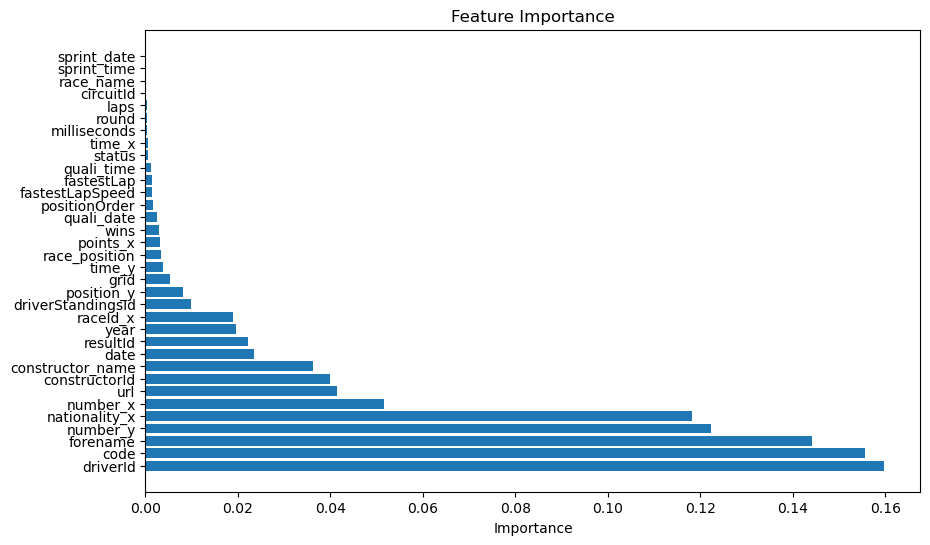

In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load your dataset
# final_df = pd.read_csv('path_to_your_data.csv')

# Step 1: Feature and Target Selection
features = [col for col in final_df.columns if col != 'race_winner']
target = 'race_winner'

# Step 2: Handle Missing Values
# Fill missing values or drop rows/columns with missing values as needed
final_df = final_df.dropna(subset=[target])  # Drop rows where target is missing

# Fill or drop missing values for features
final_df = final_df.fillna(method='ffill')  # Forward fill as an example

# Step 3: Encode Categorical Variables
label_encoders = {}
for column in features + [target]:
    if final_df[column].dtype == 'object':
        le = LabelEncoder()
        final_df[column] = le.fit_transform(final_df[column])
        label_encoders[column] = le

# Step 4: Standardize Numerical Features
scaler = StandardScaler()
final_df[features] = scaler.fit_transform(final_df[features])

# Step 5: Split Data into Training and Testing Sets
X = final_df[features]
y = final_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train and Evaluate Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Feature Importances
importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()